In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('NHPC.csv',header=None)

In [3]:
df.drop([0,1,2,3,4,5,6],axis=1,inplace=True)

In [4]:
df.head()

,7
0,123.0
1,124.0
2,123.0
3,120.0
4,124.0


In [5]:
dataset = df.values

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:
x1=[0]
x2=[0,0]
x3=[0,0,0]
y=[]
for i in range(dataset.shape[0]):
    x1.append(dataset[i][0])
    x2.append(dataset[i][0])
    x3.append(dataset[i][0])
    y.append(dataset[i][0])

In [8]:
#  b=np.array(zip(x1,x2,x3))
# x = np.delete(b,(0,1,2),axis=0)

In [9]:
x1[0:3]=[]
x2[0:3]=[]
x3[0:3]=[]
y[0:3]=[]

In [10]:
x = np.array(zip(x1,x2,x3))
y=np.array(y)
print len(x)
print len(y)

546
545


In [11]:
x_train,x_test = x[:500],x[500:]
y_train,y_test = y[:500],y[500:]

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [13]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

Using TensorFlow backend.


In [14]:
look_back=3
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back,1),stateful=True,batch_size=1))
model.add(LSTM(75,return_sequences=True,stateful=True))
model.add(LSTM(100,return_sequences=False,stateful=True))
model.add(Dense(1, activation='linear'))

In [15]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
model.fit(x_train, y_train,epochs=100,verbose=2,batch_size=1,shuffle=False)

Epoch 1/100
21s - loss: 0.0117
Epoch 2/100
18s - loss: 0.0101
Epoch 3/100
19s - loss: 0.0092
Epoch 4/100
17s - loss: 0.0103
Epoch 5/100
18s - loss: 0.0101
Epoch 6/100
18s - loss: 0.0108
Epoch 7/100
19s - loss: 0.0125
Epoch 8/100
17s - loss: 0.0136
Epoch 9/100
17s - loss: 0.0150
Epoch 10/100
18s - loss: 0.0152
Epoch 11/100
17s - loss: 0.0163
Epoch 12/100
18s - loss: 0.0172
Epoch 13/100
17s - loss: 0.0167
Epoch 14/100
18s - loss: 0.0188
Epoch 15/100
17s - loss: 0.0185
Epoch 16/100
18s - loss: 0.0187
Epoch 17/100
18s - loss: 0.0207
Epoch 18/100
17s - loss: 0.0191
Epoch 19/100
17s - loss: 0.0187
Epoch 20/100
17s - loss: 0.0223
Epoch 21/100
17s - loss: 0.0225
Epoch 22/100
17s - loss: 0.0225
Epoch 23/100
17s - loss: 0.0238
Epoch 24/100
17s - loss: 0.0268
Epoch 25/100
17s - loss: 0.0337
Epoch 26/100
38s - loss: 0.0316
Epoch 27/100
37s - loss: 0.0233
Epoch 28/100
37s - loss: 0.0358
Epoch 29/100
56s - loss: 0.0422
Epoch 30/100
37s - loss: 0.0373
Epoch 31/100
36s - loss: 0.0399
Epoch 32/100
37s 

In [ ]:
prediction = model.predict(x_test, batch_size=1)

In [18]:
prediction = scaler.inverse_transform(prediction)
y_test = scaler.inverse_transform(y_test)

//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [19]:
prediction[43:47]

array([[ 132.27653503],
       [ 132.27653503],
       [ 132.27653503]], dtype=float32)

In [23]:
y_test = y_test.reshape(-1,1)

In [40]:
import matplotlib.pyplot as plt

In [41]:
f,ax = plt.subplots(figsize=(15,10))

In [42]:
df = pd.DataFrame(prediction)
df1 = pd.DataFrame(y_test)

In [43]:
ax.plot(df,'r')
ax.plot(df1,'b')

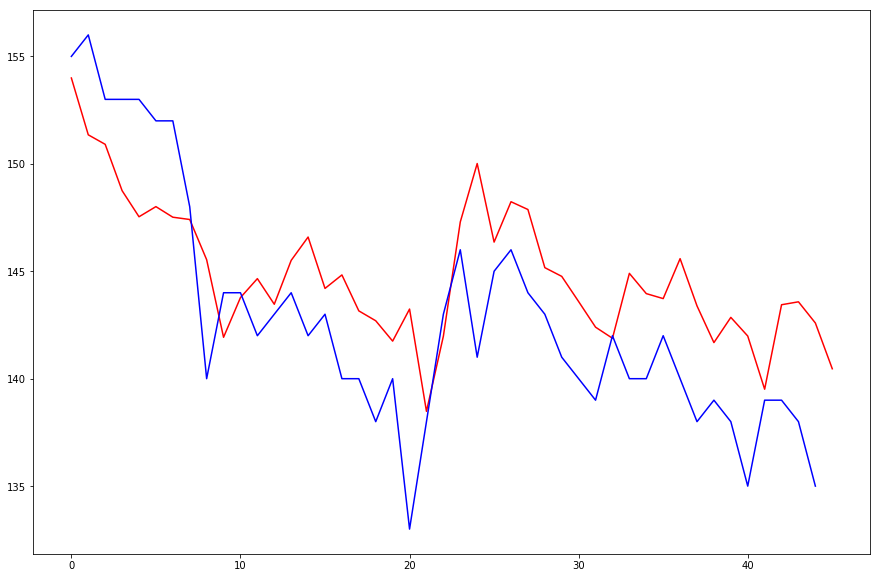

In [44]:
plt.show()

In [39]:
y_test

array([[ 155.],
       [ 156.],
       [ 153.],
       [ 153.],
       [ 153.],
       [ 152.],
       [ 152.],
       [ 148.],
       [ 140.],
       [ 144.],
       [ 144.],
       [ 142.],
       [ 143.],
       [ 144.],
       [ 142.],
       [ 143.],
       [ 140.],
       [ 140.],
       [ 138.],
       [ 140.],
       [ 133.],
       [ 138.],
       [ 143.],
       [ 146.],
       [ 141.],
       [ 145.],
       [ 146.],
       [ 144.],
       [ 143.],
       [ 141.],
       [ 140.],
       [ 139.],
       [ 142.],
       [ 140.],
       [ 140.],
       [ 142.],
       [ 140.],
       [ 138.],
       [ 139.],
       [ 138.],
       [ 135.],
       [ 139.],
       [ 139.],
       [ 138.],
       [ 135.]])